# DSCI 100 Project Final Report

Miyuki, Jane, Rachel & Meg

### Introduction



PlaiCraft is the research project of a CS group within UBC. It is focused on exploring video games and the people who play video games, specifically MineCraft. To do this, the group set up a MineCraft server and invited players to spend time on it. The group then records play sessions as well as individual player information. These include players’ demographic information (age, gender, etc.), playing time, and their skill level. We are tasked to use such datasets to answer the group’s research questions.

To help determine the “kinds” of players that contribute large amounts of data to the research, our project aims to answer the question: **how much time will a given player spend on the MineCraft server relative to their age, experience, and/or gender?**

We will be using  the `players.csv` data set to determine the relationship between the our variables of interest. This data set contains information about the players experience, subscription status, email (which has been hashed out to ensure anonymity), the total number of played hours, as well as their in-game alias, gender, and age.

### Methods and Results

**LOADING DATA**

In [57]:
#Setting a seed to ensure reproducibility of data. This seed is consistent throughout the entire project
set.seed(1997)

#Loading necessary packages
library(tidyverse)
library(dplyr)
library(ggplot2)
library(scales)
library(tidymodels)


options(repr.matrix.max.rows = 6) #To reduce the number of rows shown when printing the dataset

In [39]:
#Players.csv was loaded from its remote path via a URL

url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
players <- read_csv(url)
players

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,NA,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,NA,NA


**Figure 1.**

Since all relevant information for our project is in `players.csv`, we will load in both datasets, but only proceed with the one for players. There will be no further wrangling and analysis for `sessions.csv`.

In [58]:
url_2 <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
sessions<- read_csv(url_2)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


**Figure 2.**

**SUMMARY**

First we explore the relationships between our variables of interest, which will aid in our understanding of the data. We will look for any patterns present beforehand and use this information to decide how we want to analyze the data.

To do this, we will have to tidy `players` (**Figure 1.**) by selecting our variables of interest: `experience`, `played_hours`, `gender`, and `age`. We must then find the mean number of played hours for each observation of the variables. Then we will create visualizations using the data.

In [59]:
#TIDYING OG DATA: Removing columns that are irrelevant to our project question

players_tidy <- players |>
    select(-subscribe, -hashedEmail, -individualId, -organizationName, -name)
players_tidy

experience,played_hours,gender,age
<chr>,<dbl>,<chr>,<dbl>
Pro,30.3,Male,9
Veteran,3.8,Male,17
Veteran,0.0,Male,17
⋮,⋮,⋮,⋮
Amateur,0.0,Prefer not to say,17
Amateur,2.3,Male,17
Pro,0.2,Other,91


**Figure 3.**

In [159]:
#SUMMARY OF DATA: Calculating the mean number of hours each experience level spends playing

players_exp_mean <- players_tidy |>
group_by(experience) |>
summarize(mean_hours = mean(played_hours)) |>
arrange(c("Beginner","Amateur","Regular","Pro", "Veteran"))
players_exp_mean

experience,mean_hours
<chr>,<dbl>
Beginner,1.2485714
Amateur,6.0174603
Regular,18.2083333
Pro,2.6000000
Veteran,0.6479167


**Figure 4.**

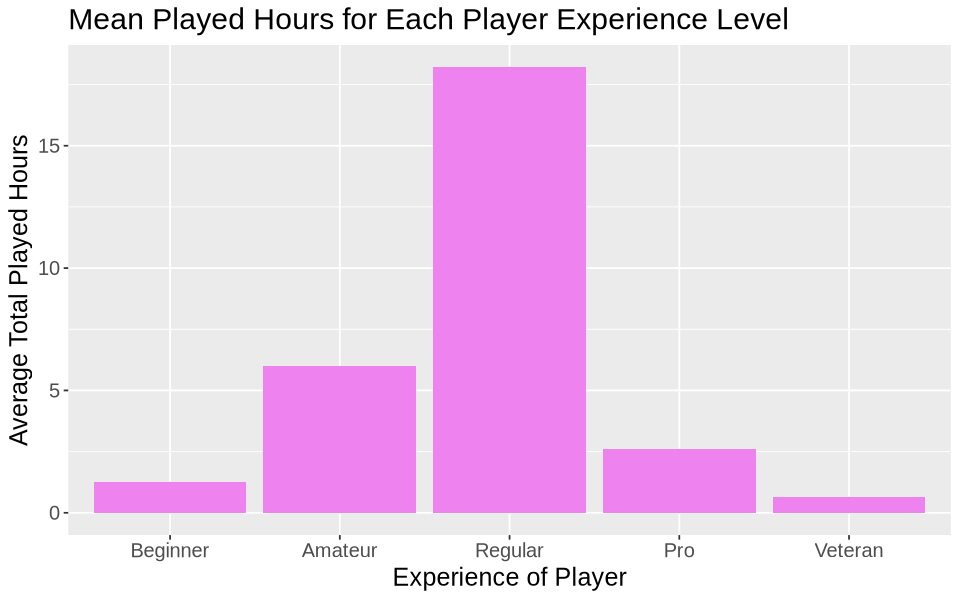

In [160]:
# SUMMARY OF DATA: Comparing the average number of played hours across experience levels

players_experience_plot <- players_exp_mean |>
    ggplot(aes(x = experience, y = mean_hours)) +
    geom_bar(stat="identity", fill = "violet") +
    labs(x = "Experience of Player",
        y = "Average Total Played Hours") +
    theme(text = element_text(size = 15)) +
    ggtitle("Mean Played Hours for Each Player Experience Level") + scale_x_discrete(limits = c("Beginner","Amateur","Regular","Pro", "Veteran"))


players_experience_plot

**Figure 5.**

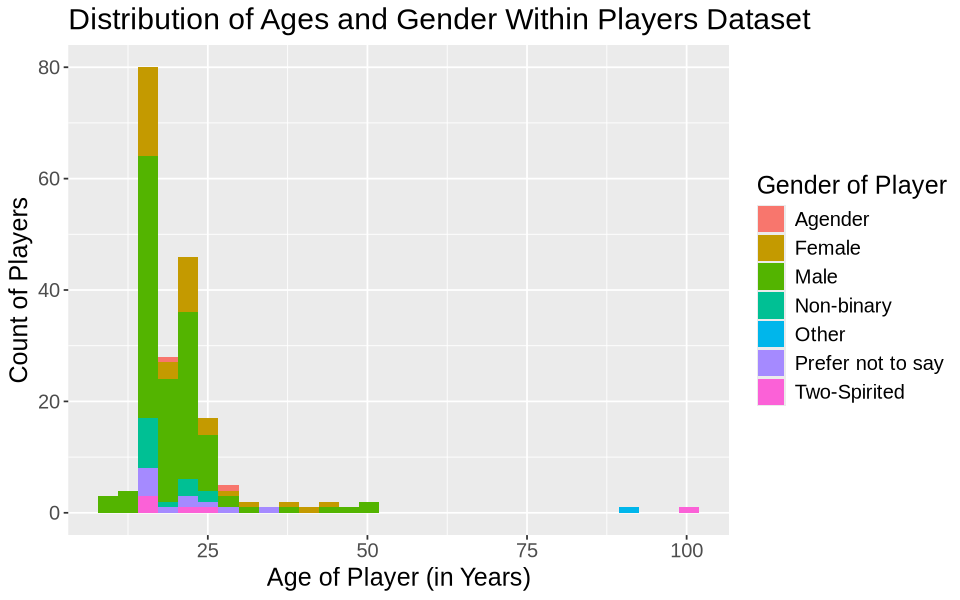

In [137]:
# SUMMARY OF DATA: Finding the distribution of ages in relation to gender within the dataset

players_age_plot <- players_tidy |>
    ggplot(aes(x = age, fill = gender)) +
    geom_histogram(bins = 30) +
    labs(x = "Age of Player (in Years)",
        y = "Count of Players",
        fill = "Gender of Player") +
    theme(text = element_text(size = 15)) +
    ggtitle("Distribution of Ages and Gender Within Players Dataset")

players_age_plot

**Figure 6.**

In [138]:
# SUMMARY OF DATA: Calculating the mean number of hours each age spends playing

players_age_mean <- players_tidy |>
group_by(age) |>
summarize(mean_hours = mean(played_hours))

players_age_mean

age,mean_hours
<dbl>,<dbl>
8,0.3
9,30.3
10,3.6
⋮,⋮
50,0.0
91,0.2
99,0.1


**Figure 7.**

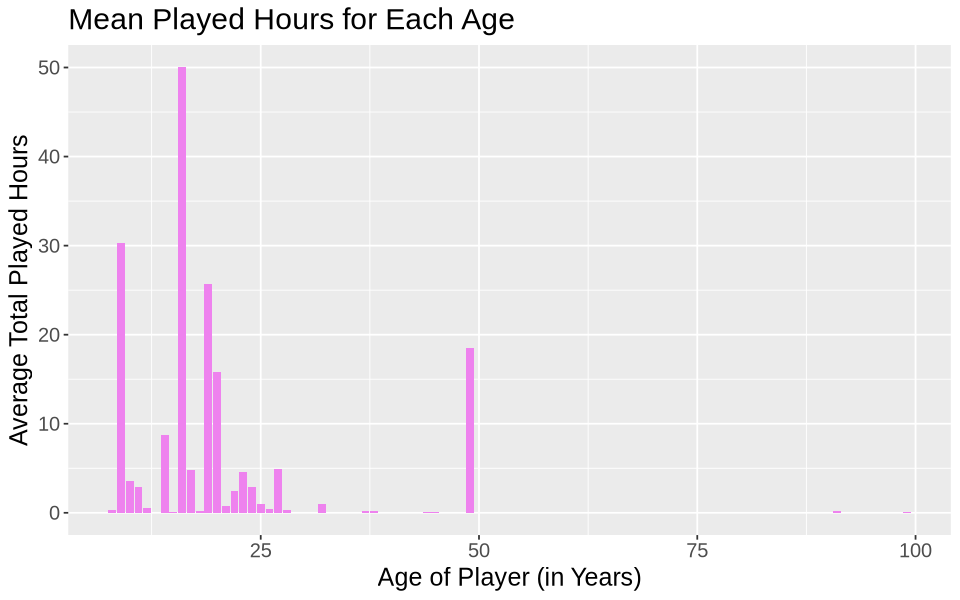

In [142]:
# SUMMARY OF DATA: Comparing the average number of played hours across ages

options(repr.plot.width = 8, repr.plot.height = 5)

players_summary_plot <- players_age_mean |>
    ggplot(aes(x = age, y = mean_hours)) +
    geom_bar(stat = "identity", fill = "violet") +
    labs(x = "Age of Player (in Years)",
        y = "Average Total Played Hours") +
    theme(text = element_text(size = 15)) +
    ggtitle("Mean Played Hours for Each Age")

players_summary_plot

**Figure 8.**

In [140]:
# SUMMARY OF DATA: Calculating the mean number of hours each gender spends playing

players_gender_mean <- players_tidy |>
group_by(gender) |>
summarize(mean_hours = mean(played_hours))

players_gender_mean

gender,mean_hours
<chr>,<dbl>
Agender,6.250000
Female,10.635135
Male,4.127419
⋮,⋮
Other,0.20000000
Prefer not to say,0.37272727
Two-Spirited,0.08333333


**Figure 9.**

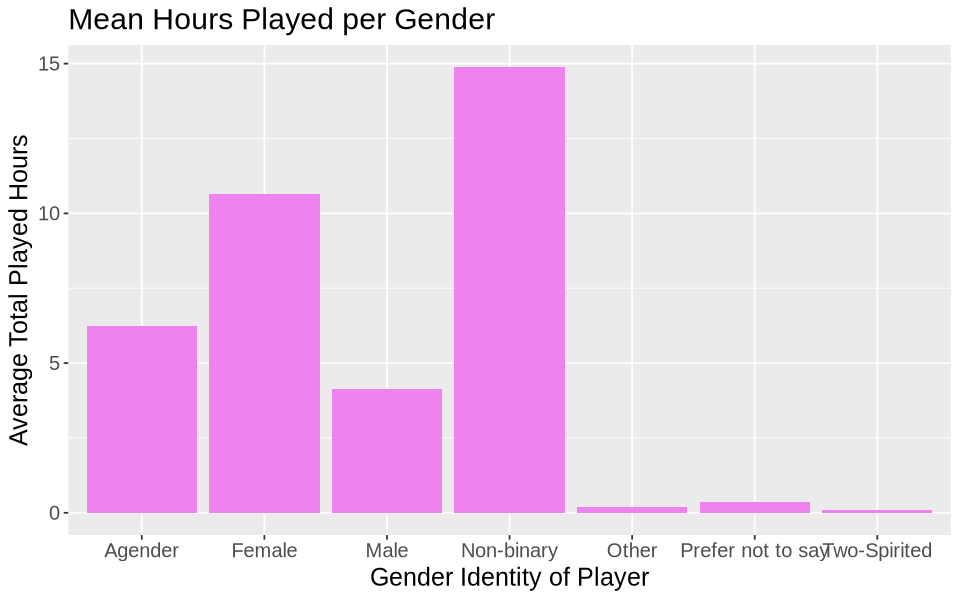

In [141]:
# SUMMARY OF DATA: Comparing the average number of played hours across genders

options(repr.plot.width = 8, repr.plot.height = 5)

players_g_summary_plot <- players_gender_mean |>
    ggplot(aes(x = gender, y = mean_hours)) +
    geom_bar(stat = "identity", fill = "violet") +
    labs(x = "Gender Identity of Player",
        y = "Average Total Played Hours") +
    theme(text = element_text(size = 15)) +
    ggtitle("Mean Hours Played per Gender")

players_g_summary_plot

**Figure 10.**

**EXPLANATION OF ANALYSIS**

Answering the question of how much time a player will spend on the server, and therefore how much more data they might contribute to the study, means that our response variable must be `played_hours`. As this is also a predictive question using numerical data, we know to use regression. The figures above do not initially demonstrate linear relationships which means we are better off using $k$-nn regression, using `age`, `experience`, and `gender` as predictor variables for reasons mentioned above.

However, there are a few adjustments to be made before we can proceed with our analysis. Since regression plots assume continuous numerical data for both the x and y-axes, we need to assign numerical values to the categorical variables `experience`, and `gender`.

In [65]:
set.seed(1997)
# Turning experience from a categorical variable to a numerical variable

players_tidy_exp <- players_tidy |>
    mutate(experience_num = case_when(experience == "Veteran" ~ 5,
                                      experience == "Beginner" ~ 1,
                                      experience == "Amateur" ~ 2,
                                      experience == "Regular" ~ 3,
                                      experience == "Pro" ~ 4))

In [66]:
set.seed(1997)
# Generalizing gender variable to 3 internal categories: Male, Female, Other

players_gender_new <- players_tidy_exp |>
    mutate(gender = case_when(gender == "Male" ~ "Male",
                              gender == "Female"~ "Female",
                              TRUE ~ "Other"))

In [68]:
set.seed(1997)
# Turning gender from a categorical variable to a numerical variable

players_tidy_new <- players_gender_new |>
    mutate(gender_male = case_when(gender == "Male" ~ 1,
                                   gender == "Female" ~ 0,
                                   gender == "Other" ~ 0),
           gender_female = case_when(gender == "Male" ~ 0,
                                     gender == "Female" ~ 1,
                                     gender == "Other" ~ 0),
           gender_other = case_when(gender == "Male" ~ 0,
                                    gender == "Female" ~ 0,
                                    gender == "Other" ~ 1))

In [69]:
set.seed(1997)
# Tidying our improved players dataset by removing "repeat" variables (keeping only numerical values)

players_tidy_new <- players_tidy_new |>
    select(played_hours, age, experience_num, gender_male, gender_female, gender_other)

players_tidy_new

played_hours,age,experience_num,gender_male,gender_female,gender_other
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
30.3,9,4,1,0,0
3.8,17,5,1,0,0
0.0,17,5,1,0,0
⋮,⋮,⋮,⋮,⋮,⋮
0.0,17,2,0,0,1
2.3,17,2,1,0,0
0.2,91,4,0,0,1


**Figure 11.**

Now that we have prepared our dataset for analysis, we must first split the data between a set for training and a set for testing our final model. We have decided to take 75% of the dataset for training.

In [70]:
set.seed(1997)

players_split <- initial_split(players_tidy_new, prop = 0.75, strata = played_hours)
training_set <- training(players_split) 
testing_set <- testing(players_split)

Next, we perform cross-validation on our **training data** to choose the optimal value for $k$ using RMSE. Ideally, we should end up with a relatively small RMSE that indicates our predicitions are close to true values. 

First, we create a model specification for $k$-nn, specifiying `set_mode("regression")` to indicate our choice of analysis. Then, we create a recipe where we assign `played_hours` as the response variable and `age`, `experience`, and `gender` as the predictor variables.

In [71]:
set.seed(1997)

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

players_recipe <- recipe(played_hours ~ age + experience_num + gender_male + gender_female + gender_other, data = training_set) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

Next, we perform a cross-validation with 5 folds on our training data, and test values of $k$ from 1-50 by jumps of 5. We then create a workflow to combine our work so far. Finally, we can collect statistics from our model and find the minimum value for RMSE.

In [107]:
set.seed(1997)

vfold <- vfold_cv(training_set, v = 5, strata = played_hours)

gridvals <- tibble(neighbors = seq(from = 1, to = 35, by = 1))

players_results <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) |>
    tune_grid(resamples = vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")

players_min <- players_results|>
    filter(mean == min(mean))

players_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
33,rmse,standard,30.61761,5,5.677752,Preprocessor1_Model33


**Figure 12.**

We will now take the $k$ value that gave us the lowest RMSE and use it to re-train our $k$-nn regression model on the entire training data set. Then, we make predictions on our testing data, and collect metrics on the quality of our regression.

In [109]:
set.seed(1997)

new_players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 33) |>
    set_engine("kknn") |>
    set_mode("regression")

players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(new_players_spec) |>
    fit(data = training_set)

players_summary <- players_fit |>
    predict(testing_set) |>
    bind_cols(testing_set) |>
    metrics(truth = played_hours, estimate = .pred) |>
    filter(.metric == "rmse")
players_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,8.944772


**Figure 13.**

It seems our RMSE and RMSPE are quite different from one another which means our model might not be all that reliable across our split datasets. We will discuss this further later on.

For now, we check how our predictions line up with the true values of the training set.

In [144]:
players_preds <- predict(players_fit, training_set) |>
    bind_cols(training_set)
players_preds

.pred,played_hours,age,experience_num,gender_male,gender_female,gender_other
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.30000,0,17,5,1,0,0
13.45758,0,17,2,0,1,0
11.86970,0,19,3,0,1,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
4.287879,2.1,24,2,1,0,0
11.812121,0.8,22,2,0,1,0
8.036364,1.7,17,4,1,0,0


**Figure 14.**

Based on the above, some predicted values are quite similar to the true values, while others have large discrepancies. Let's visualize our results to find out more.

**VISUALIZATIONS FROM ANALYSIS**

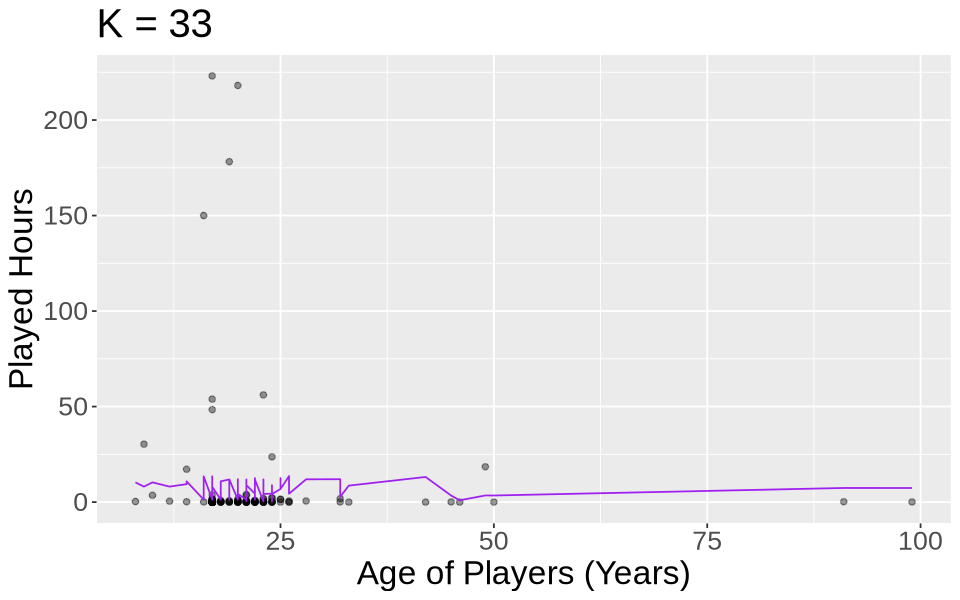

In [148]:
players_plot <- players_preds |>
    ggplot(aes(x = age, y = played_hours )) +
    geom_point(alpha = 0.4) +
    geom_line(data = players_preds,
             mapping = aes(x = age, y = .pred),
             color = "purple") +
    labs(x = "Age of Players (Years)",
        y = "Played Hours") +
    ggtitle("K = 33") +
    theme(text = element_text(size = 20))

players_plot

**Figure 15.**

From the graph when k=10, we can see that most of the data points are of younger ages, many are clustered under 25 and there are a lot fewer points at the older ages. We can also see that there are a few outliers as some players have logged more than 150 hours of playtime. These individuals and their data play a large role in the model as the model may predict that a player will play more hours than they actually do. Moving on, we can see that there are large jumps and fluctuations in the graph with lower ages whereas the older ages have a pretty flat line trend. This tells us that in younger players, there is more variation as well as more playtime on average, however these spikes may be a result of the outliers. As for older players, there is little variation and they consistently expected to play fewer hours on average.

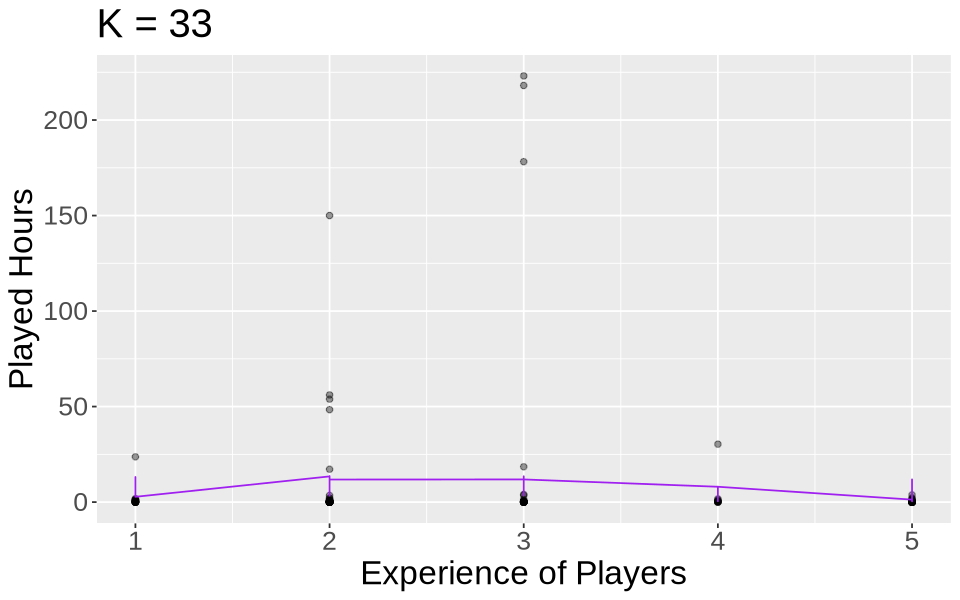

In [149]:
players_plot_2 <- players_preds |>
    ggplot(aes(x = experience_num, y = played_hours )) +
    geom_point(alpha = 0.4) +
    geom_line(data = players_preds,
             mapping = aes(x = experience_num, y = .pred),
             color = "purple") +
    labs(x = "Experience of Players",
        y = "Played Hours") +
    ggtitle("K = 33") +
    theme(text = element_text(size = 20))
players_plot_2

**Figure 16.**

Firstly, we can see that this regression model can not predict values in between the experience levels due to the fact that the data for experience is categorical which is why the shape of the graph is not one we would normally see. Moreover, we can see that a player’s play starts off low, peaks at experience level 3, and drops back down again. From this we can conclude that inexperienced players are less likely to have much play time. As players become more comfortable with the game, their play time increases. Then, as players begin to master the game, they are expected to have less playtime, similar to those who are just beginning.


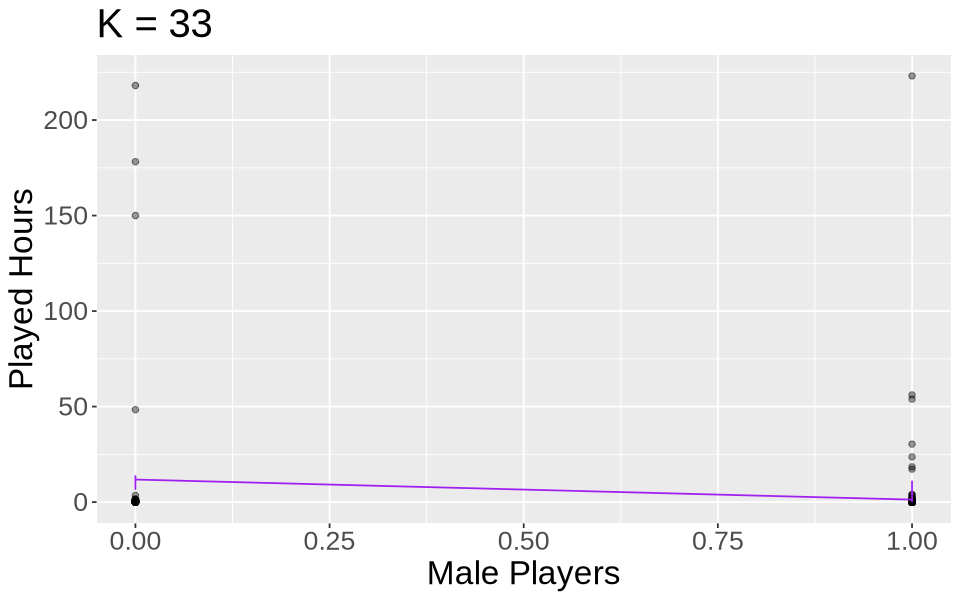

In [150]:
players_plot_3 <- players_preds |>
    ggplot(aes(x = gender_male, y = played_hours )) +
    geom_point(alpha = 0.4) +
    geom_line(data = players_preds,
             mapping = aes(x = gender_male, y = .pred),
             color = "purple") +
    labs(x = "Male Players",
        y = "Played Hours") +
    ggtitle("K = 33") +
    theme(text = element_text(size = 20))
players_plot_3

**Figure 17.**

For this graph, 0 represents all non male players and 1 represents all male players. For the values between 0 and 1, they can essentially be disregarded since they don't represent anything because these are categorical values. Overall, we can see that non-male players are expected to have more playtime than male players.


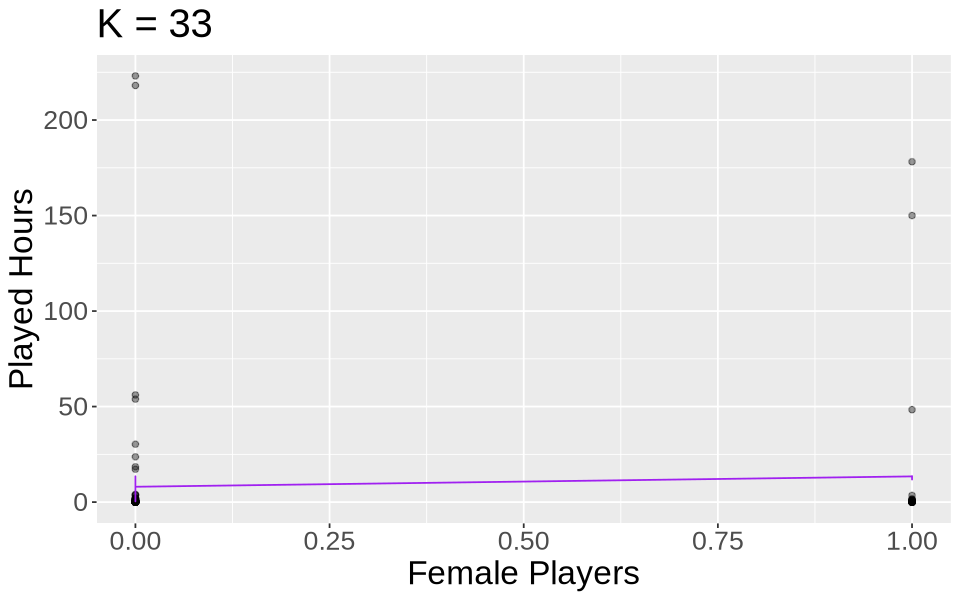

In [151]:
players_plot_4 <- players_preds |>
    ggplot(aes(x = gender_female, y = played_hours )) +
    geom_point(alpha = 0.4) +
    geom_line(data = players_preds,
             mapping = aes(x = gender_female, y = .pred),
             color = "purple") +
    labs(x = "Female Players",
        y = "Played Hours") +
    ggtitle("K = 33") +
    theme(text = element_text(size = 20))
players_plot_4

**Figure 18.**

Similar to the graph for male players, the values between 0 and 1 do not provide us any information. We can see that when comparing female players and non female players, both are expected to have very similar hours of playtime, a little less than 75 hours.


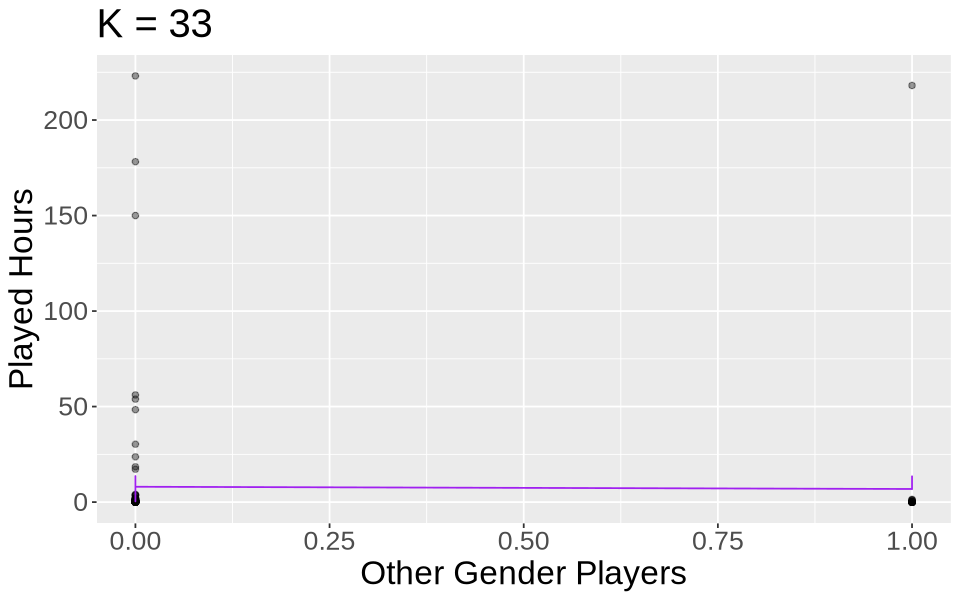

In [152]:
players_plot_5 <- players_preds |>
    ggplot(aes(x = gender_other, y = played_hours )) +
    geom_point(alpha = 0.4) +
    geom_line(data = players_preds,
             mapping = aes(x = gender_other, y = .pred),
             color = "purple") +
    labs(x = "Other Gender Players",
        y = "Played Hours") +
    ggtitle("K = 33") +
    theme(text = element_text(size = 20))
players_plot_5

**Figure 19.**

Again, similar to the two graphs above we can disregard the values between 0 and 1. With 1 representing other gender players and 0 representing male and female players, we can conclude that other gender players are expected to have slightly more playtime, around 75 hours. Therefore, by comparing these three graphs we can expect other gender players to have the most playtime.


### Discussion

Summarize what was found... was this expected? 

Using a KNN regression model with age, experience and gender as predictors, we have found that our model can predict how many hours a player will play with a low degree of accuracy. When we calculated our RMSE value using the testing dataset, we found that there was roughly a 16.14 hr error from our regression model, showing that the model struggles with accurately predicting the time played using these variables as predictors. 

### References

Timbers, T. (2024, August 21). Chapter 7 Regression I: K-nearest neighbors | Data Science.      Datasciencebook.ca. https://datasciencebook.ca/regression1.html#multivariable-k-nn-regression